In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from src.montecarlo import MC_european_call_price
from src.pricing_formulas import european_call_price

In [4]:
pd.set_option("display.float_format", "{:.4f}".format)

# European call option

## Variance reduction

We fix the following parameters, and compare the price of the European call obtained with the analytic formula, vanilla MC method, and MC method with variance reduction.

In [6]:
# Parameters
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": 10}

# Strike
K = 150

# Number of MC samples: the first is used for estimation of the expectation, the second one for the variance
N_SAMPLES = (1000, 100)

In [7]:
df_index = [(False, False), (True, False), (False, True), (True, True)]
df_cols = ["Antithetic", "Moment matching", "Price estimate", "Variance"]

results = pd.DataFrame(columns=df_cols)

for i, (at, mm) in enumerate(df_index):
    MC_price = MC_european_call_price(
        N_SAMPLES, PARAMS, K=K, antithetic=at, moment_matching=mm
    )
    results.loc[i] = [at, mm, np.mean(MC_price), np.std(MC_price)]

real_price = european_call_price(PARAMS, K)
print(f"Real price: {real_price:.4f}\n")
print(results.to_string(index=False))

Real price: 5.4098

 Antithetic  Moment matching  Price estimate  Variance
      False            False          5.4715    0.4564
       True            False          5.3888    0.3038
      False             True          5.4242    0.1902
       True             True          5.4020    0.0442


## Varying strike

We now look at graphs describing the price of the option as a function of the strike.

In [8]:
# Parameters
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": 10}

# Strike from 100 to 150, sampled 20 times
N_POINTS = 20
K = np.linspace(100, 150, N_POINTS)

# Number of MC samples, with one for each strike
N_SAMPLES = (1000, 100, N_POINTS)

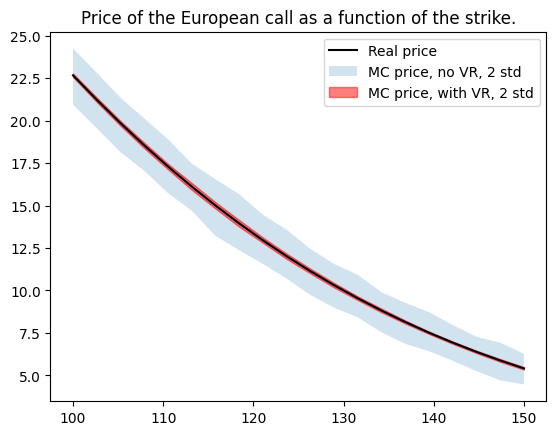

Average standard deviation: 0.6787

Average standard deviation with variance reduction: 0.06307


In [9]:
# Prices obtained with the analytic formula
real_prices = european_call_price(PARAMS, K)

# Prices obtained by MC sampling and no variance reduction
MC_prices = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=False, antithetic=False
)
mean = np.mean(MC_prices, axis=0)
std = np.std(MC_prices, axis=0)

# Prices obtained by MC sampling and both variance reduction methods

MC_prices_vr = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=True, antithetic=True
)
means_vr = np.mean(MC_prices_vr, axis=0)
std_vr = np.std(MC_prices_vr, axis=0)

# Plot the graph
plt.plot(K, real_prices, "k-", label="Real price")
plt.fill_between(
    K, mean - 2 * std, mean + 2 * std, alpha=0.2, label="MC price, no VR, 2 std"
)
plt.fill_between(
    K,
    means_vr - 2 * std_vr,
    means_vr + 2 * std_vr,
    alpha=0.5,
    color="r",
    label="MC price, with VR, 2 std",
)
plt.title(f"Price of the European call as a function of the strike.")
plt.legend()
plt.show()

print(
    f"Average standard deviation: {np.mean(std):.4g}\n\nAverage standard deviation with variance reduction: {np.mean(std_vr):.4g}"
)

## Varying maturity

Same as above, but with a fixed strike of 150 and a varying maturity between 1 and 20 years.

In [10]:
N_POINTS = 50
T = np.linspace(1, 50, N_POINTS)
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": T}

K = 150

N_SAMPLES = (1000, 100, N_POINTS)

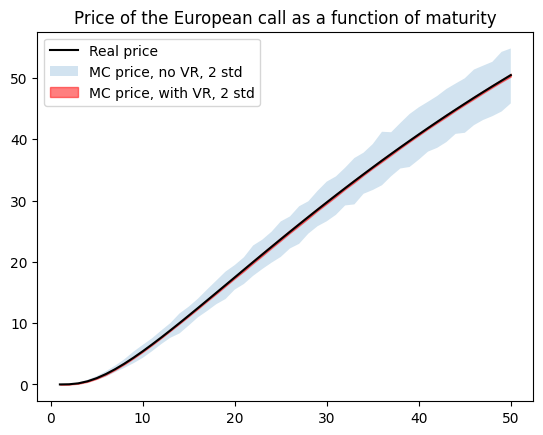

Average standard deviation: 1.285

Average standard deviation with variance reduction: 0.07288


In [11]:
# Prices obtained with the analytic formula
real_prices = european_call_price(PARAMS, K)

# Prices obtained by MC sampling and no variance reduction
MC_prices = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=False, antithetic=False
)
mean = np.mean(MC_prices, axis=0)
std = np.std(MC_prices, axis=0)

# Prices obtained by MC sampling and both variance reduction methods

MC_prices_vr = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=True, antithetic=True
)
means_vr = np.mean(MC_prices_vr, axis=0)
std_vr = np.std(MC_prices_vr, axis=0)

# Plot the graph
plt.plot(T, real_prices, "k-", label="Real price")
plt.fill_between(
    T, mean - 2 * std, mean + 2 * std, alpha=0.2, label="MC price, no VR, 2 std"
)
plt.fill_between(
    T,
    means_vr - 2 * std_vr,
    means_vr + 2 * std_vr,
    alpha=0.5,
    color="r",
    label="MC price, with VR, 2 std",
)
plt.title(f"Price of the European call as a function of maturity")
plt.legend()
plt.show()

print(
    f"Average standard deviation: {np.mean(std):.4g}\n\nAverage standard deviation with variance reduction: {np.mean(std_vr):.4g}"
)

# Barrier option

The same analysis is performed for a down-and-out call option, which expires if the underlying goes below a certain barrier. Here, we assume barrier < strike.

In [5]:
from src.montecarlo import MC_barrier_call_price
from src.pricing_formulas import barrier_call_price

In [6]:
# Parameters
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": 10}

# Strike
K = 150

# Barrier
H = 90

# Number of MC samples: the first is used for estimation of the expectation, the second one for the number of time ticks, and the third one for the variance.
N_SAMPLES = (100, 1000, 50)

In [7]:
df_index = [(False, False), (True, False), (False, True), (True, True)]
df_cols = ["Antithetic", "Moment matching", "Price estimate", "Variance"]

results = pd.DataFrame(columns=df_cols)

for i, (at, mm) in enumerate(df_index):
    MC_price = MC_barrier_call_price(
        N_SAMPLES, PARAMS, K=K, H=H, antithetic=at, moment_matching=mm
    )
    results.loc[i] = [at, mm, np.mean(MC_price), np.std(MC_price)]

real_price = barrier_call_price(PARAMS, K, H)
print(f"Real price: {real_price:.4f}\n")
print(results.to_string(index=False))

Real price: 4.4071

 Antithetic  Moment matching  Price estimate  Variance
      False            False          4.3485    1.4044
       True            False          4.5188    1.0396
      False             True          4.4527    1.0026
       True             True          4.4373    0.7249


In [24]:
# Parameters
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": 1}
H = 90

# Strike from 100 to 150, sampled 20 times
N_POINTS = 20
K = np.linspace(90, 120, N_POINTS)

# Number of MC samples, with one for each strike
N_SAMPLES = (100, 100, 50, N_POINTS)

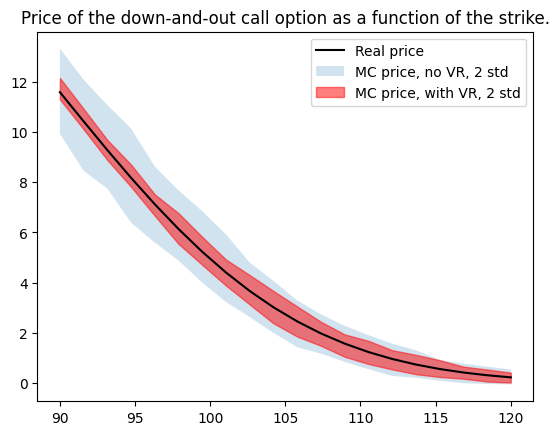

Average standard deviation: 0.5144

Average standard deviation with variance reduction: 0.2193


In [25]:
# Prices obtained with the analytic formula
real_prices = barrier_call_price(PARAMS, K, H)

# Prices obtained by MC sampling and no variance reduction
MC_prices = MC_barrier_call_price(
    N_SAMPLES, PARAMS, K=K, H=H, moment_matching=False, antithetic=False
)
mean = np.mean(MC_prices, axis=0)
std = np.std(MC_prices, axis=0)

# Prices obtained by MC sampling and both variance reduction methods

MC_prices_vr = MC_barrier_call_price(
    N_SAMPLES, PARAMS, K=K, H=H, moment_matching=True, antithetic=True
)
means_vr = np.mean(MC_prices_vr, axis=0)
std_vr = np.std(MC_prices_vr, axis=0)

# Plot the graph
plt.plot(K, real_prices, "k-", label="Real price")
plt.fill_between(
    K, mean - 2 * std, mean + 2 * std, alpha=0.2, label="MC price, no VR, 2 std"
)
plt.fill_between(
    K,
    means_vr - 2 * std_vr,
    means_vr + 2 * std_vr,
    alpha=0.5,
    color="r",
    label="MC price, with VR, 2 std",
)
plt.title(f"Price of the down-and-out call option as a function of the strike.")
plt.legend()
plt.show()

print(
    f"Average standard deviation: {np.mean(std):.4g}\n\nAverage standard deviation with variance reduction: {np.mean(std_vr):.4g}"
)

In [10]:
# Parameters
N_POINTS = 20
T = np.linspace(1, 20, N_POINTS)
PARAMS = {"S0": 100, "r": 0.02, "sigma": 0.1, "T": T}
H = 90

# Strike from 100 to 150, sampled 20 times

K = 150

# Number of MC samples, with one for each strike
N_SAMPLES = (100, 1000, 10, N_POINTS)

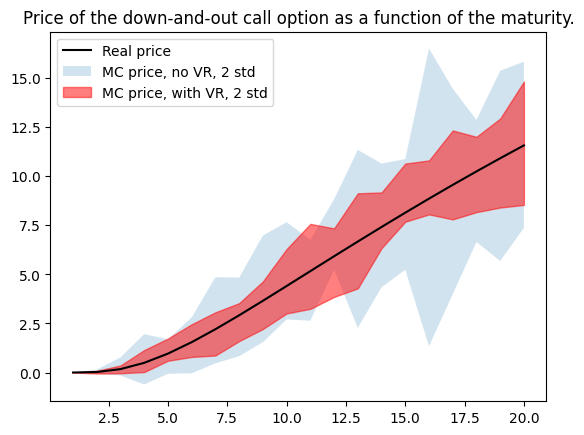

Average standard deviation: 1.323

Average standard deviation with variance reduction: 0.6839


In [11]:
# Prices obtained with the analytic formula
real_prices = barrier_call_price(PARAMS, K, H)

# Prices obtained by MC sampling and no variance reduction
MC_prices = MC_barrier_call_price(
    N_SAMPLES, PARAMS, K=K, H=H, moment_matching=False, antithetic=False
)
mean = np.mean(MC_prices, axis=0)
std = np.std(MC_prices, axis=0)

# Prices obtained by MC sampling and both variance reduction methods

MC_prices_vr = MC_barrier_call_price(
    N_SAMPLES, PARAMS, K=K, H=H, moment_matching=True, antithetic=True
)
means_vr = np.mean(MC_prices_vr, axis=0)
std_vr = np.std(MC_prices_vr, axis=0)

# Plot the graph
plt.plot(T, real_prices, "k-", label="Real price")
plt.fill_between(
    T, mean - 2 * std, mean + 2 * std, alpha=0.2, label="MC price, no VR, 2 std"
)
plt.fill_between(
    T,
    means_vr - 2 * std_vr,
    means_vr + 2 * std_vr,
    alpha=0.5,
    color="r",
    label="MC price, with VR, 2 std",
)
plt.title(f"Price of the down-and-out call option as a function of the maturity.")
plt.legend()
plt.show()

print(
    f"Average standard deviation: {np.mean(std):.4g}\n\nAverage standard deviation with variance reduction: {np.mean(std_vr):.4g}"
)